In [15]:
# utilizado para manejos de directorios y rutas
import os
import pandas as pd
# Computacion vectorial y cientifica para python
import numpy as np
import csv
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

In [16]:
# cargar a una variable el dataset sintetico
data = pd.read_csv('dataedad.csv')
data

,edad,ingresos
0,5,20
1,10,50
2,15,100
3,20,500
4,25,1900
5,30,4000
6,35,7500
7,40,11000
8,45,12000
9,50,14000


In [17]:
# Abrir el archivo CSV para lectura
with open('dataedad.csv', 'r') as file:
    # Crear un objeto lector CSV
    reader = csv.reader(file)
    # Leer todas las filas en una lista y saltar la primera fila
    rows = [row for i, row in enumerate(reader) if i > 0]
    # Convertir la lista de filas en una matriz numpy
    data = np.array(rows)
    # Obtener las columnas de la matriz
    col1 = data[:, 0]
    y = data[:, 1]


In [18]:
# añadimos otra caracteristica x2 que sera x1**2 y lo convertimos a arrays
x1 = col1.astype(np.float64).reshape(-1, 1)
col2 = np.square(x1)
x2 = col2.astype(np.float64).reshape(-1, 1)
x2

array([[  25.],
       [ 100.],
       [ 225.],
       [ 400.],
       [ 625.],
       [ 900.],
       [1225.],
       [1600.],
       [2025.],
       [2500.],
       [3025.],
       [3600.],
       [4225.],
       [4900.],
       [5625.],
       [6400.]])

In [19]:
# Unir los dos vectores en una matriz de dos columnas
x = np.hstack((x1,x2))
# Convertir la columna 'y' a un array
y = y.astype(np.float64)

In [20]:
# normalizacion de caracteristicas
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [21]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(x)

print(x)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[5.000e+00 2.500e+01]
 [1.000e+01 1.000e+02]
 [1.500e+01 2.250e+02]
 [2.000e+01 4.000e+02]
 [2.500e+01 6.250e+02]
 [3.000e+01 9.000e+02]
 [3.500e+01 1.225e+03]
 [4.000e+01 1.600e+03]
 [4.500e+01 2.025e+03]
 [5.000e+01 2.500e+03]
 [5.500e+01 3.025e+03]
 [6.000e+01 3.600e+03]
 [6.500e+01 4.225e+03]
 [7.000e+01 4.900e+03]
 [7.500e+01 5.625e+03]
 [8.000e+01 6.400e+03]]
Media calculada: [  42.5 2337.5]
Desviación estandar calculada: [  23.04886114 2015.29309283]
[[-1.62697843 -1.14747577]
 [-1.41004798 -1.11026034]
 [-1.19311752 -1.04823463]
 [-0.97618706 -0.96139862]
 [-0.7592566  -0.84975233]
 [-0.54232614 -0.71329575]
 [-0.32539569 -0.55202889]
 [-0.10846523 -0.36595173]
 [ 0.10846523 -0.15506429]
 [ 0.32539569  0.08063343]
 [ 0.54232614  0.34114145]
 [ 0.7592566   0.62645975]
 [ 0.97618706  0.93658833]
 [ 1.19311752  1.27152721]
 [ 1.41004798  1.63127637]
 [ 1.62697843  2.01583582]]


In [22]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
m = y.size
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)

[[ 1.         -1.62697843 -1.14747577]
 [ 1.         -1.41004798 -1.11026034]
 [ 1.         -1.19311752 -1.04823463]
 [ 1.         -0.97618706 -0.96139862]
 [ 1.         -0.7592566  -0.84975233]
 [ 1.         -0.54232614 -0.71329575]
 [ 1.         -0.32539569 -0.55202889]
 [ 1.         -0.10846523 -0.36595173]
 [ 1.          0.10846523 -0.15506429]
 [ 1.          0.32539569  0.08063343]
 [ 1.          0.54232614  0.34114145]
 [ 1.          0.7592566   0.62645975]
 [ 1.          0.97618706  0.93658833]
 [ 1.          1.19311752  1.27152721]
 [ 1.          1.41004798  1.63127637]
 [ 1.          1.62697843  2.01583582]]


In [23]:
# funcion del costo
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [24]:
# funcion descenso por gradiente
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

theta calculado por el descenso por el gradiente: [6324.06691625 2606.97776836 -127.89965049]


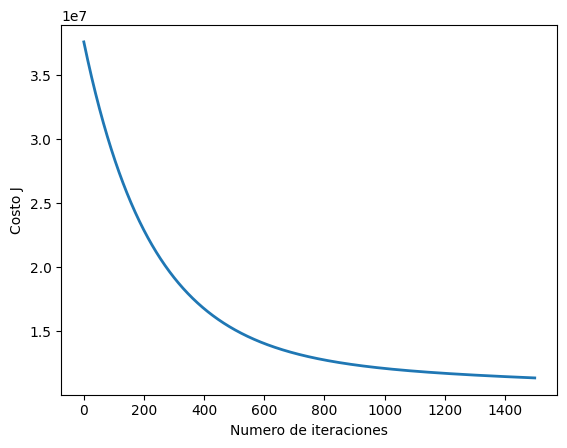

In [25]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.002 # alpha = 0.003
num_iters = 1500

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [26]:
X_array = [1, 27, 729]
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El ingreso predecido es de: ${:.2f}'.format(price))


El ingreso predecido es de: $4673.00


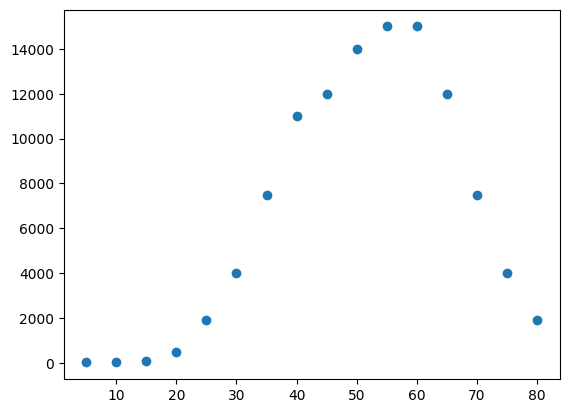

In [27]:
pyplot.scatter(x=x1, y=y)

In [49]:
# la ecuacion de la normal
# Cargar datos
# Abrir el archivo CSV para lectura
with open('dataedad.csv', 'r') as file:
    # Crear un objeto lector CSV
    reader = csv.reader(file)
    # Leer todas las filas en una lista y saltar la primera fila
    rows = [row for i, row in enumerate(reader) if i > 0]
    # Convertir la lista de filas en una matriz numpy
    data = np.array(rows)
    # Obtener las columnas de la matriz
    col1 = data[:, 0]
    y = data[:, 1]

# añadimos otra caracteristica x2 que sera x1**2 y lo convertimos a arrays
x1 = col1.astype(np.float64).reshape(-1, 1)
col2 = np.square(x1)
x2 = col2.astype(np.float64).reshape(-1, 1)
x2

# Unir los dos vectores en una matriz de dos columnas
x = np.hstack((x1,x2))
# Convertir la columna 'y' a un array
y = y.astype(np.float64)
m = y.shape[0] # numero de ejemplos de entrenamiento
x = np.concatenate([np.ones((m, 1)), x], axis=1)

In [47]:
# funcion de la ecuacion de la normal
def normalEqn(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [50]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(x, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

X_array = [1, 27, 729]
ingreso = np.dot(X_array, theta) 

print('Los ingresos predecidos son: (usando la ecuación de la normal): ${:.0f}'.format(ingreso))


Theta calculado a partir de la ecuación de la normal: [-8.74526786e+03  7.93890406e+02 -7.84628852e+00]
Los ingresos predecidos son: (usando la ecuación de la normal): $6970
